In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


# Load data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
#train_len = len(train)

In [4]:
#concat the two datasets to avoid differernt features when adding dummy features
#dataset = pd.concat([train, test]).reset_index(drop=True)

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis

<h3><b>Missing Values</b></h3>

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_values = train.select_dtypes(include=numerics)
numeric_values.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [8]:
#select all category features and check which of them has nan values
categorical_values = train.select_dtypes(include=object)
categorical_values.isnull().sum() / len(train)

Name        0.000000
Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

<b><i>Since Cabin have 77% missing values I decide to remove the column. 
Embarked I choose to add the mode value to fill in the missing values. 
For age I need to explore a little more to decide how to fill those missing values</i></b>

In [9]:
train.drop('Cabin', axis=1, inplace=True)

In [10]:
train['Embarked'].mode()
train['Embarked'] = train['Embarked'].fillna("S")

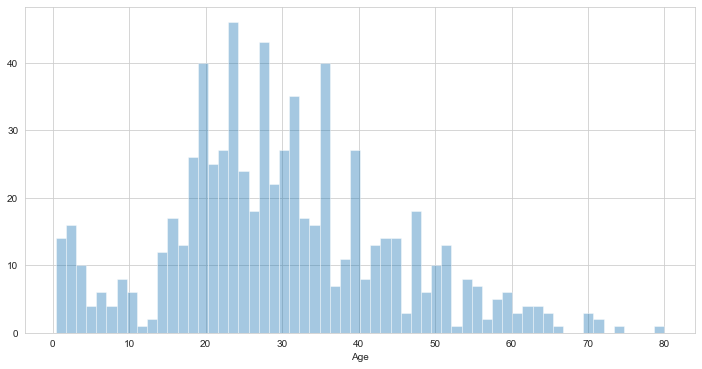

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(train['Age'].dropna(), bins=60, kde=False)

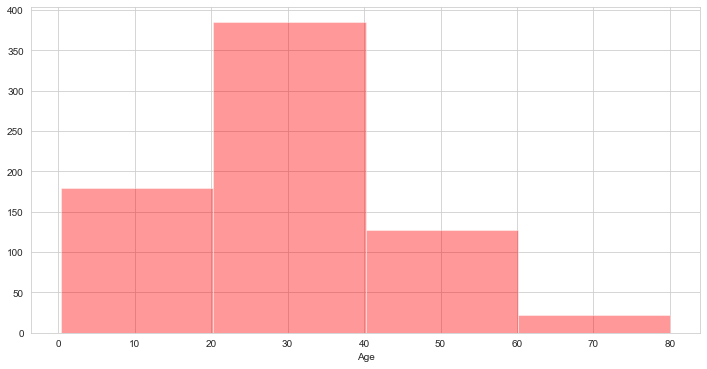

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(train['Age'].dropna(), bins=4, kde=False, color='r' )

([<matplotlib.patches.Wedge at 0x276fca22608>,
 [Text(-1.0956005952219894, -0.09828191974734024, '0-20'),
  Text(0.925775200555991, -0.594087769639735, '21-40'),
  Text(-0.12716815046642518, 1.0926244833001633, '41-60'),
  Text(-0.7703671331724281, 0.785197096357147, '60+')],
 [Text(-0.5976003246665397, -0.05360831986218558, '25.1%'),
  Text(0.5049682912123586, -0.3240478743489463, '53.9%'),
  Text(-0.06936444570895918, 0.5959769908909981, '17.9%'),
  Text(-0.420200254457688, 0.42828932528571645, '3.1%')])

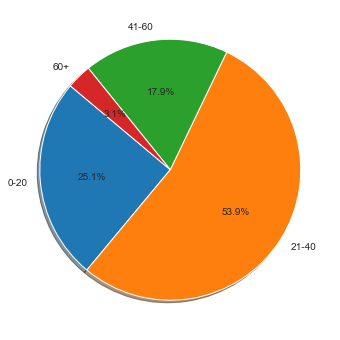

In [13]:
#show the age  groups in a pie chart
age_groups = train['Age'].dropna().value_counts(bins=4, sort=False)
plt.figure(figsize=(12,6))
labels = '0-20','21-40', '41-60', '60+'
plt.pie(age_groups, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140) 

<h4><i>I decide to split up the age to 4 age groups. 0-20, 21-40, 41-60, 60+ and create a function to add the average age in each group</i></h4>

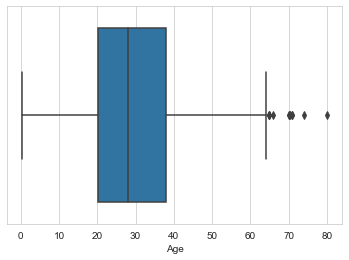

In [14]:
sns.boxplot(train['Age'])

In [15]:
def average_age(dataset):
    
    ### Find out how many people are in a certain age group 0-20 , 21-40, 41-60, 60+
    age_group_1 = []
    age_group_2 = []
    age_group_3 = []
    age_group_4 = []

    for i in range(len(dataset)):

        if dataset['Age'][i] < 20:
            age_group_1.append(dataset['Age'][i])
        elif dataset['Age'][i] >= 20 and dataset['Age'][i] < 40:
            age_group_2.append(dataset['Age'][i])
        elif dataset['Age'][i] >= 40 and dataset['Age'][i] < 60:
            age_group_3.append(dataset['Age'][i])
        elif dataset['Age'][i] >= 60 and dataset['Age'][i] < 90:
            age_group_4.append(dataset['Age'][i])

    #calculate the average age for all age groups
    avg_age_1 = round(np.mean(age_group_1),0) 
    avg_age_2 = round(np.mean(age_group_2),0) 
    avg_age_3 = round(np.mean(age_group_3),0)
    avg_age_4 = round(np.mean(age_group_4),0)
    
    #calculate how many people (%) are in each group
    total_people = dataset['Age'].notnull().sum()
    percent_age_1 = round(len(age_group_1) / total_people,2)
    percent_age_2 = round(len(age_group_2) / total_people,2)
    percent_age_3 = round(len(age_group_3) / total_people,2)
    percent_age_4 = round(len(age_group_4) / total_people,2)

    #calculate how many people there are in each group for the missing values
    total_people_nan = dataset['Age'].isnull().sum()
    ave_age_group_1 = round(percent_age_1 * total_people_nan,0)
    ave_age_group_2 = round(percent_age_2 * total_people_nan,0)
    ave_age_group_3 = round(percent_age_3 * total_people_nan,0)
    ave_age_group_4 = round(percent_age_4 * total_people_nan,0)
    
    
    #setting all nan to 0 and add them to a list
    dataset['Age'] = dataset.fillna(0)['Age']

    indices_with_age_0 = []

    for z in range(len(dataset)):

        if dataset['Age'][z] == 0:
            indices_with_age_0.append(z)

    #setup steps that will be checked in the for loop, first step is all people 0-19 next step is all people 20-39 and so on.
    step_1 = ave_age_group_1              
    step_2 = step_1 + ave_age_group_2      
    step_3 = step_2 + ave_age_group_3
    step_4 = step_3 + ave_age_group_4

    #loop through all rows of age = 0 and add the average age for each age group. 
    for x in range(len(indices_with_age_0)):

        if x <= step_1:
            dataset.at[indices_with_age_0[x], 'Age'] = avg_age_1
        elif x > step_1 and x <= step_2:
             dataset.at[indices_with_age_0[x], 'Age'] = avg_age_2

        elif x > step_2 and x <= step_3:
             dataset.at[indices_with_age_0[x], 'Age'] = avg_age_3
        elif x > step_3 and x <= step_4:
             dataset.at[indices_with_age_0[x], 'Age'] = avg_age_4
    
    return dataset['Age']                                                                                                                                                                                                               

In [16]:
train['Age'] = average_age(train)

In [17]:
#All nan values  are handled.
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h3><b>Try to find correlations between the features with different plots</b></h3>

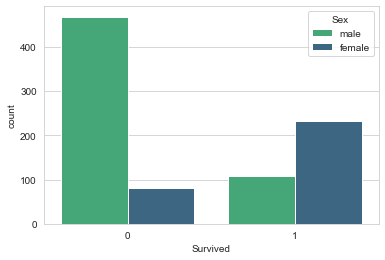

In [18]:
sns.countplot(x='Survived', hue='Sex', data=train,palette='viridis_r')

<b>It looks like the Sex is a factor when it comes to who survived. More women than men survived according to the graphs above.</b> 

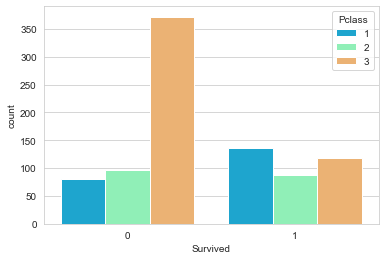

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=train,palette='rainbow')

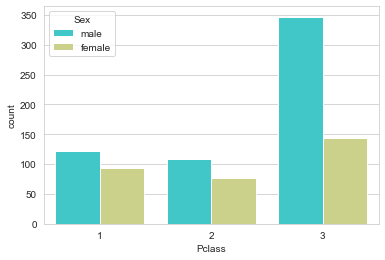

In [20]:
sns.countplot(x='Pclass', hue='Sex', data=train,palette='rainbow')

<b>It looks like the Pclass is also a factor when it comes to who survived. Most of the people who died where in class 3</b>

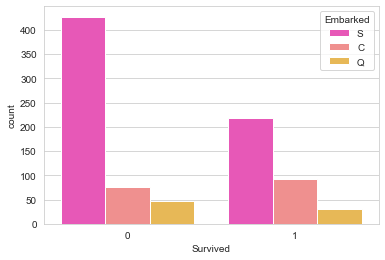

In [21]:
sns.countplot(x='Survived', hue='Embarked', data=train,palette='spring')

<b><i>It looks like people who embarked from S survived more often than people who embarked from the other places. Why is this ?</i></b>

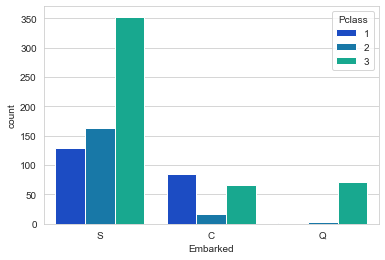

In [22]:
sns.countplot(x='Embarked', hue='Pclass', data=train,palette='winter')

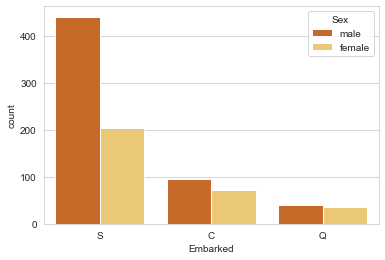

In [23]:
sns.countplot(x='Embarked', hue='Sex', data=train,palette='YlOrBr_r')

<b><i>It looks like a lot of the people from 1 and 2 class embarked from S and also alot of women. But in this case I would say it's because the majority of women embarked from S and therefore embarked from S has more survivals than the other places. </i></b>

In [24]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

# Categorical variables

In [25]:
categorical_values = train.select_dtypes(include=object)
categorical_values

Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Embarked  
0           A/5 21171        S  
1            PC 17599        C  
2    STON/O2. 3101282        S  
3              113803        S  
4              373450        S  
..                ...      ...  
886            211536        S  
887            112053        S  
888        W./C. 6607        S  
889            111369        C  
890            370376        Q  

[891 rows x 4 columns]

<h5><i>I decide to drop Name and Ticket since they have to many uinique values and isn't a good fit for dummy variables. </i></h5>

In [26]:
train.head()
categorical_values = train.select_dtypes(include=object)
categorical_values

Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               Ticket Embarked  
0           A/5 21171        S  
1            PC 17599        C  
2    STON/O2. 3101282        S  
3              113803        S  
4              373450        S  
..                ...      ...  
886            211536        S  
887            112053        S  
888        W./C. 6607        S  
889            111369        C  
890            370376        Q  

[891 rows x 4 columns]

In [27]:
#create function to loop throug categorical features and add dummy values
def dummy_df(df, todummylist):
    for x in todummylist:
       dummies = pd.get_dummies(df[x], prefix=x, dummy_na = False, drop_first=True)
       df = df.drop(x, 1)
       df = pd.concat([df, dummies], axis = 1)
    return df

In [28]:
#create dummies for all categorical features
dummies = list(categorical_values)
train = dummy_df(train, dummies)

In [29]:
train.rename(columns={'Sex_male':'Male'}, inplace=True)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Name_Abelson, Mr. Samuel  ...  Ticket_W./C. 14258  Ticket_W./C. 14263  \
0                         0  ...                   0                   0   
1                         0  ...                   0                   0   
2                         0  ...                   0                   0   
3                         0  ...                   0                   0   
4                         0  ...                   0                   0   

   Ticket_W./C. 6607  Ticket_W./C. 6608  Ticket_W./C. 6609  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   Ticket_W.E.P. 5734  Ticket_W/C 14208  Ticket_WE/P 5735  Embarked_Q  \
0                   0                 0                 0           0   
1                   0                 0                 0           0   
2                   0                 0                 0           0   
3                   0                 0                 0           0   
4                   0                 0                 0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  

[5 rows x 1580 columns]

In [30]:
#train["Pclass"] = train["Pclass"].astype("category")
#train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc", drop_first=True)

# Correlations

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), annot=True)

In [32]:
#create function to decide which features that are correlated which eachother.
def correlation(dataset, threshold):
    
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [33]:
#check if any feature correlate with eachother.
corr_features = correlation(train, 0.8)
len(set(corr_features))
corr_features

{'Ticket_110564',
 'Ticket_110813',
 'Ticket_111240',
 'Ticket_111320',
 'Ticket_111369',
 'Ticket_111426',
 'Ticket_111427',
 'Ticket_111428',
 'Ticket_112050',
 'Ticket_112052',
 'Ticket_112053',
 'Ticket_112058',
 'Ticket_112059',
 'Ticket_112277',
 'Ticket_112379',
 'Ticket_113028',
 'Ticket_113043',
 'Ticket_113050',
 'Ticket_113051',
 'Ticket_113055',
 'Ticket_113056',
 'Ticket_113059',
 'Ticket_113501',
 'Ticket_113503',
 'Ticket_113509',
 'Ticket_113510',
 'Ticket_113514',
 'Ticket_113767',
 'Ticket_113773',
 'Ticket_113783',
 'Ticket_113784',
 'Ticket_113786',
 'Ticket_113787',
 'Ticket_113788',
 'Ticket_113792',
 'Ticket_113794',
 'Ticket_113796',
 'Ticket_113800',
 'Ticket_113804',
 'Ticket_113807',
 'Ticket_11752',
 'Ticket_11753',
 'Ticket_11755',
 'Ticket_11765',
 'Ticket_11769',
 'Ticket_11771',
 'Ticket_11774',
 'Ticket_11813',
 'Ticket_12233',
 'Ticket_12460',
 'Ticket_13049',
 'Ticket_13213',
 'Ticket_13214',
 'Ticket_13509',
 'Ticket_13567',
 'Ticket_13568',
 'Ticket

# Model

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [35]:
train_PC = train.copy()
train_PC["Pclass"] = train["Pclass"].astype("category")
train_PC = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc", drop_first=True)
train_PC.head()

PassengerId  Survived   Age  SibSp  Parch     Fare  \
0            1         0  22.0      1      0   7.2500   
1            2         1  38.0      1      0  71.2833   
2            3         1  26.0      0      0   7.9250   
3            4         1  35.0      1      0  53.1000   
4            5         0  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  ...  \
0                         0                                           0  ...   
1                         0                                           0  ...   
2                         0                                           0  ...   
3                         0                                           0  ...   
4                         0                                           0  ...   

   Ticket_W./C. 6607  Ticket_W./C. 6608  Ticket_W./C. 6609  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   Ticket_W.E.P. 5734  Ticket_W/C 14208  Ticket_WE/P 5735  Embarked_Q  \
0                   0                 0                 0           0   
1                   0                 0                 0           0   
2                   0                 0                 0           0   
3                   0                 0                 0           0   
4                   0                 0                 0           0   

   Embarked_S  Pc_2  Pc_3  
0           1     0     1  
1           0     0     0  
2           1     0     1  
3           1     0     0  
4           1     0     1  

[5 rows x 1581 columns]

KeyboardInterrupt: 

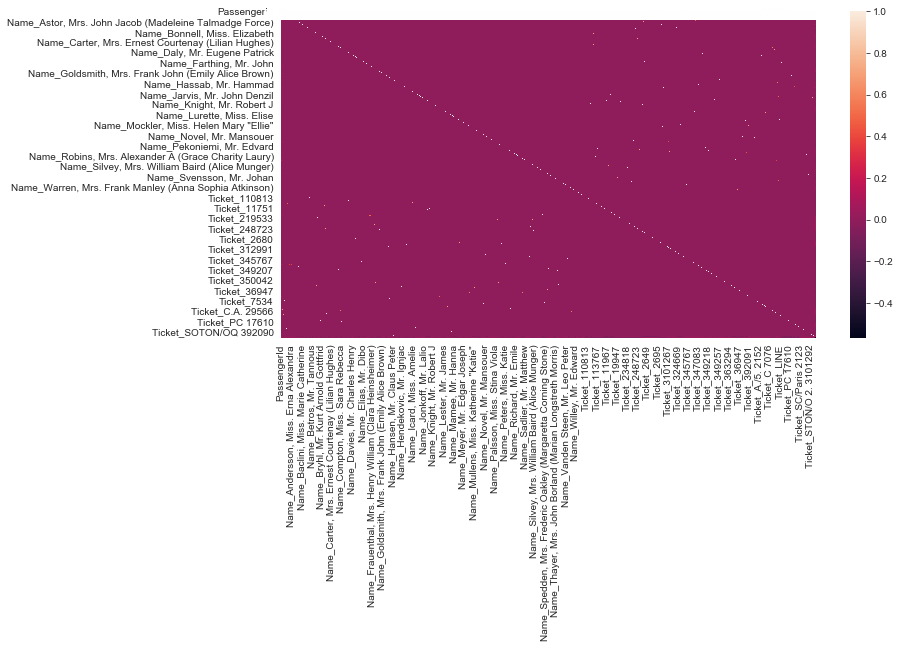

In [36]:
plt.figure(figsize=(12,6))

sns.heatmap(train_PC.corr(), annot=True)

In [ ]:
features = ['Male', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pc_2', 'Pc_3', 'Age']
X = train_PC[features]
y = train_PC['Survived']

In [ ]:
X = train_PC.drop(['Survived', 'PassengerId'], axis=1)
y = train_PC['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
X_train.head()

In [ ]:
scaler_X = MinMaxScaler()
scale_X_train = scaler_X.fit_transform(X_train)
scale_X_test = scaler_X.transform(X_test)

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
classifier.fit(scale_X_train, y_train)

In [ ]:
## Decision tree
parameters = [{
               'criterion': ['entropy', 'gini'],
               'max_depth': [3,5,10,15,20],
               'splitter': ['best', 'random'],
               'ccp_alpha': [0.0,0.1,0.2,0.3,0.4,1.0]
               
                }]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=10)

grid_search = grid_search.fit(scale_X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print(best_acc)
print(best_para)

In [ ]:
classifier = RandomForestClassifier(max_depth=10, n_estimators=300, criterion='gini')
classifier.fit(scale_X_train, y_train)

In [ ]:
## Applying grid search  to find the best model and the best parameters
parameters = [{'n_estimators': [200,300,400, 500,600,800],
               'criterion': ['entropy', 'gini'],
               'max_depth': [3,5,10,15,20]
                }]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=10)

grid_search = grid_search.fit(scale_X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_
print(best_acc)
print(best_para)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth = 10))
sel.fit(scale_X_train, y_train)
sel.get_support()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
classifier.fit(scale_X_train, y_train)

In [ ]:
####KNeighborsClassifier
parameters = [{'metric': ['euclidean', 'minkowski', 'manhattan'], 'p': [1, 2, 3, 4, 5, 6]
                }]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=10)

grid_search = grid_search.fit(scale_X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_
print(best_acc)
print(best_para)

In [ ]:
classifier = SVC(kernel = 'rbf', C = 1000, gamma = 0.08)
classifier.fit(scale_X_train, y_train)

In [ ]:
####SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'gamma': [0.09, 0.08,0.07,0.06,0.05],
               'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.09, 0.08,0.07,0.06,0.05]
                }]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv=10)

grid_search = grid_search.fit(scale_X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_
print(best_acc)
print(best_para)

In [ ]:
#check accuracy with Cross val score
accuracies = cross_val_score(estimator = classifier, X = scale_X_train, y = y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

In [ ]:
y_pred = classifier.predict(scale_X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
classification = classification_report(y_test,y_pred)
print(cm)
print(classification)

# Submission

In [ ]:
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
test.head()


In [ ]:
test.isnull().sum()

In [ ]:
#Fix the test set so it has the same features as we trained on
test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc", drop_first=True)

test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

test['Age'] = average_age(test)
test['Fare'] = test['Fare'].fillna(0)

In [ ]:
categorical_values_test = test.select_dtypes(include=object)

In [ ]:
#create dummies for all categorical features
dummies_test = list(categorical_values_test)
test = dummy_df(test, dummies_test)

In [ ]:
test.rename(columns={'Sex_male':'Male'}, inplace=True)
test.head()

In [ ]:
test = test[features]
test.head()

In [ ]:
X_valid = scaler_X.transform(test)

In [ ]:
prediction = classifier.predict(X_valid)

In [ ]:
prediction

In [ ]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)